# **Mathematical Tools for Big Data - Assignment 3**

### **Students :**
- **Alexandra de Carvalho** (93346)
- **Diogo Pedrosa** (xxxxx)
- **Roshan Poudel** (109806)

## **Common Steps**

## Reading and General data analysis

In [98]:
import pandas as pd
import numpy as np
import random

random.seed(2022)
# reading data
data = pd.read_csv("data/cash-crops-nepal.csv")
# visualize some data
data.iloc[:5,:]

,Year AD,Year BS,Crop,Area,Production,Yield
0,1984/85,2041/42,OILSEED,127820,84030,657
1,1985/86,2042/43,OILSEED,137920,78390,568
2,1986/87,2043/44,OILSEED,142890,82500,577
3,1987/88,2044/45,OILSEED,151490,94370,623
4,1988/89,2045/46,OILSEED,154860,99190,641


In [99]:
data.shape

(105, 6)

In [100]:
# What are the different crops
print(data.iloc[:,2].unique())

['OILSEED' 'POTATO' 'TOBACCO' 'SUGARCANE' 'JUTE']


In [101]:
# shuffling data
agri_data = data.iloc[np.random.permutation(len(data))]
trunc_data = agri_data[["Area", "Production", "Yield"]]
trunc_data.iloc[:5,:]

,Area,Production,Yield
78,58126,2103426,36187
90,14000,16000,1143
65,24910,616580,24752
3,151490,94370,623
10,184460,116300,630


In [102]:
# (custom choice for) normalizing data
trunc_data = trunc_data / trunc_data.max()
trunc_data.iloc[:5,:]

,Area,Production,Yield
78,0.305237,0.885242,0.899794
90,0.073518,0.006734,0.028421
65,0.130810,0.259492,0.615461
3,0.795520,0.039716,0.015491
10,0.968655,0.048946,0.015665


## Loading SOM utils

In [103]:
from scripts.som_utils import neighborhood_preservation_trustworthiness
from scripts.som_utils import som_train_predict
from scripts.som_utils import visualize_som

## Base SOM (SOM1)

SOM training epoches 2
neighborhood radius  2.6878753795222865
learning rate  0.009048374180359595
-------------------------------------
SOM training epoches 4
neighborhood radius  2.4082246852806923
learning rate  0.008187307530779819
-------------------------------------
SOM training epoches 6
neighborhood radius  2.157669279974593
learning rate  0.007408182206817179
-------------------------------------
SOM training epoches 8
neighborhood radius  1.9331820449317627
learning rate  0.006703200460356393
-------------------------------------
SOM training epoches 10
neighborhood radius  1.7320508075688772
learning rate  0.006065306597126334
-------------------------------------
SOM training epoches 12
neighborhood radius  1.5518455739153594
learning rate  0.005488116360940264
-------------------------------------
SOM training epoches 14
neighborhood radius  1.3903891703159093
learning rate  0.004965853037914096
-------------------------------------
SOM training epoches 16
neighborhood ra

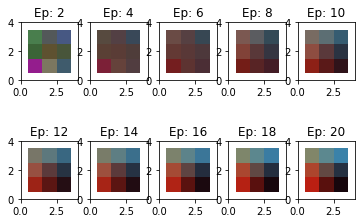

,Year AD,Year BS,Crop,Area,Production,Yield,Area_norm,Production_norm,Yield_norm,bmu,bmu_idx
78,1999/2000,2056/57,SUGARCANE,58126,2103426,36187,0.305237,0.885242,0.899794,"[[0.22833997730224462, 0.5181168821323493, 0.6...","[2, 2]"
90,1990/91,2047/48,JUTE,14000,16000,1143,0.073518,0.006734,0.028421,"[[0.0813104099919611, 0.020062268618780715, 0....","[2, 0]"
65,1986/87,2043/44,SUGARCANE,24910,616580,24752,0.130810,0.259492,0.615461,"[[0.22833997730224462, 0.5181168821323493, 0.6...","[2, 2]"
3,1987/88,2044/45,OILSEED,151490,94370,623,0.795520,0.039716,0.015491,"[[0.7398939623990163, 0.11978884686853672, 0.0...","[0, 0]"
10,1994/95,2051/52,OILSEED,184460,116300,630,0.968655,0.048946,0.015665,"[[0.7398939623990163, 0.11978884686853672, 0.0...","[0, 0]"


In [104]:
from scripts.our_som1 import SOM as SOM_1_base
# som = SOM(x_size, y_size, num_features)
som_1 = SOM_1_base(3,3,3)
joined_df, clustered_df = som_train_predict(som_1, trunc_data, agri_data, num_epochs=20, init_learning_rate=0.01)
joined_df.iloc[0:5]

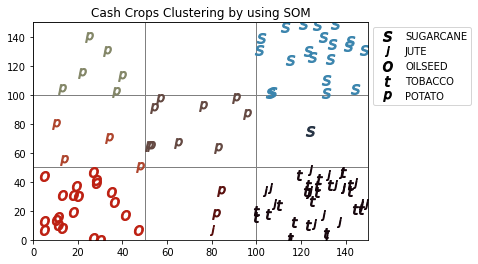

In [105]:
visualize_som(som_1, joined_df)

In [106]:
trunc_data.head()

,Area,Production,Yield
78,0.305237,0.885242,0.899794
90,0.073518,0.006734,0.028421
65,0.130810,0.259492,0.615461
3,0.795520,0.039716,0.015491
10,0.968655,0.048946,0.015665


In [107]:
cd = pd.DataFrame(clustered_df['bmu'].apply(lambda x: x[0].tolist()), index = trunc_data.index)
cd = cd.bmu.apply(list).apply(pd.Series).astype(float)
cd.head()

,0,1,2
78,0.228340,0.518117,0.676595
90,0.081310,0.020062,0.044884
65,0.228340,0.518117,0.676595
3,0.739894,0.119789,0.066640
10,0.739894,0.119789,0.066640


<br /> <br />

## **Q1:** Which numerical criteria would you use to measure an enhancement of the algorithm?

Throughout this assignment, we will be exploring different changes to the proposed algorithm, and their impact in results. Thus, we are in need of a numerical criteria that will allow us to measure results. For this reason, we are going to use the metrics of neighbourhood preservation and trustworthiness. These measure how the projection preserves the neighborhoods present in the input space by ranking the k-nearest neighbors of each sample before and after projection. The implementation of this criteria is in function `neighborhood_preservation_trustworthiness` inside `soms/som_utils.py` file.

In [108]:
neighborhood_preservation_trustworthiness(1, trunc_data, cd)

(0.9193712436430883, 0.8725535116107421)

<br /> <br />

## **Q2:** Write a SOM1A version, where you alter the interpolation curve of the learning factor. Can you get improvements?

**TODO : ANSWER HERE**


**Notes**
- Changed the decay func to  `initial_learning_rate * math.pow(2, (-iteration / num_iterations))`
- Graph is similar to the `initial_learning_rate * np.exp(-iteration / num_iterations)` (It was on base)
- Check graph here [desmos graph](https://www.desmos.com/calculator/cpaljvrhav)

SOM training epoches 2
neighborhood radius  2.6878753795222865
learning rate  0.005887040186524746
-------------------------------------
SOM training epoches 4
neighborhood radius  2.4082246852806923
learning rate  0.003465724215775732
-------------------------------------
SOM training epoches 6
neighborhood radius  2.157669279974593
learning rate  0.0020402857733683695
-------------------------------------
SOM training epoches 8
neighborhood radius  1.9331820449317627
learning rate  0.0012011244339814311
-------------------------------------
SOM training epoches 10
neighborhood radius  1.7320508075688772
learning rate  0.0007071067811865475
-------------------------------------
SOM training epoches 12
neighborhood radius  1.5518455739153594
learning rate  0.0004162766037009366
-------------------------------------
SOM training epoches 14
neighborhood radius  1.3903891703159093
learning rate  0.000245063709469745
-------------------------------------
SOM training epoches 16
neighborhoo

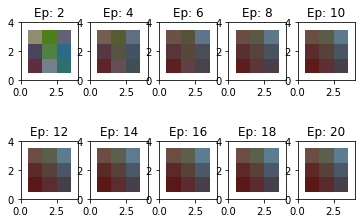

In [109]:
from scripts.our_som1_A import SOM as SOM_1_A
# som = SOM(x_size, y_size, num_features)
som_1_A = SOM_1_A(3,3,3)
joined_df, clustered_df = som_train_predict(som_1_A, trunc_data, agri_data, num_epochs=20, init_learning_rate=0.01)
#joined_df.iloc[0:5]

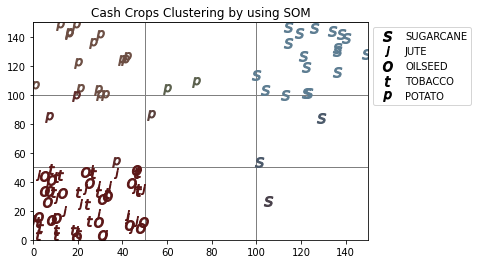

In [110]:
visualize_som(som_1_A, joined_df)

In [111]:
cd = pd.DataFrame(clustered_df['bmu'].apply(lambda x: x[0].tolist()), index = trunc_data.index)
cd = cd.bmu.apply(list).apply(pd.Series).astype(float)

In [112]:
neighborhood_preservation_trustworthiness(1, trunc_data, cd)

(0.9982431807674527, 0.7323097857996942)

**DISCUSSION HERE**

<br /> <br />

## **Q3:** Write the version SOM1B, where you change the interpolation curve of the standard deviation. Can you get improvement?

<br /> <br />

## **Q4:** Write the version SOM1C, where you change the normal distribution to other distribution of your choice. Did you achieve improvements?